In [8]:
import numpy as np
from qiskit import transpile
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import XGate, RZGate
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPScheduleAnalysis
from qiskit.visualization import timeline_drawer  

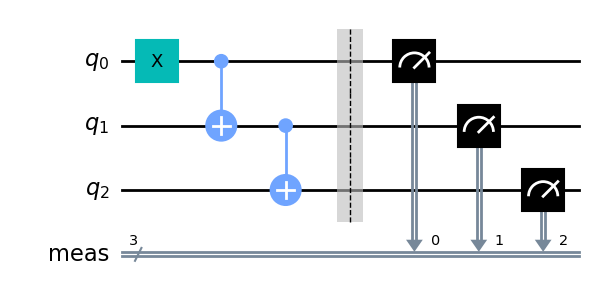

AttributeError: 'DAGInNode' object has no attribute 'name'

In [19]:
circ = QuantumCircuit(3)
circ.x(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()
display(circ.draw("mpl"))
durations = InstructionDurations([
    ("h", 0, 50), ("cx", [0, 1], 700), ("reset", None, 10),
    ("cx", [1, 2], 200), ("cx", [2, 3], 300),
    ("x", None, 50), ("measure", None, 1000)
])

# balanced X-X sequence on all qubits
dd_sequence = [XGate(), XGate()]
pm = PassManager([ALAPScheduleAnalysis(durations),
                  PadDynamicalDecoupling(durations, dd_sequence, pulse_alignment=6)])
pm.run(circ).draw(fold=-1)

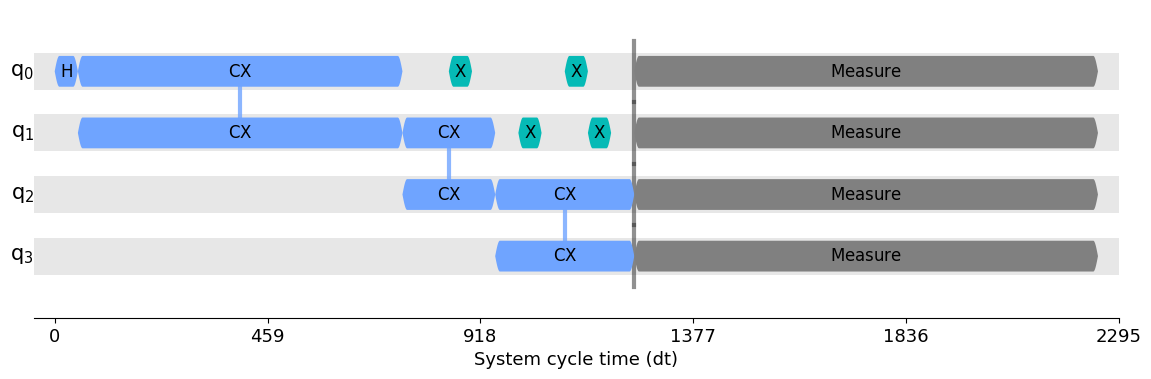

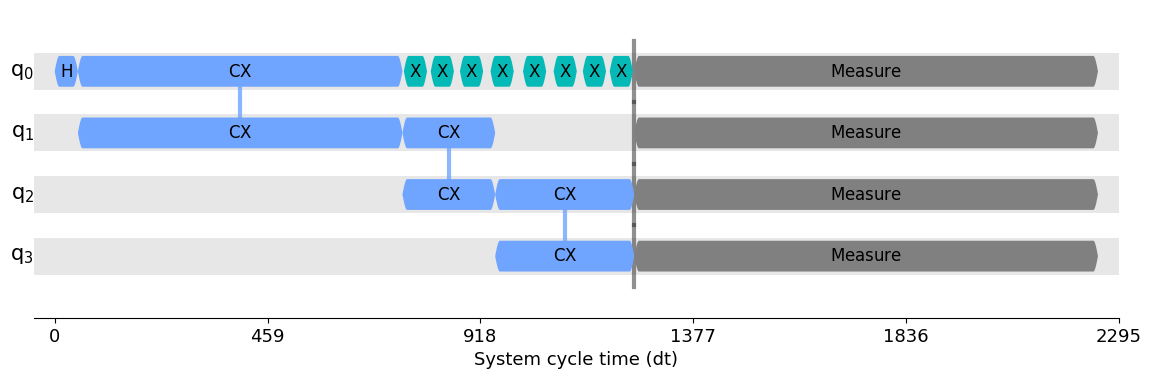

In [14]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import XGate
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPScheduleAnalysis, PadDynamicalDecoupling
from qiskit.visualization import timeline_drawer
circ = QuantumCircuit(4)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.cx(2, 3)
circ.measure_all()
durations = InstructionDurations(
    [("h", 0, 50), ("cx", [0, 1], 700), ("reset", None, 10),
     ("cx", [1, 2], 200), ("cx", [2, 3], 300),
     ("x", None, 50), ("measure", None, 1000)]
)

# balanced X-X sequence on all qubits
dd_sequence = [XGate(), XGate()]
pm = PassManager([ALAPScheduleAnalysis(durations),
                  PadDynamicalDecoupling(durations, dd_sequence)])
circ_dd = pm.run(circ)
display(timeline_drawer(circ_dd))

# Uhrig sequence on qubit 0
n = 8
dd_sequence = [XGate()] * n
def uhrig_pulse_location(k):
    return np.sin(np.pi * (k + 1) / (2 * n + 2)) ** 2
spacing = []
for k in range(n):
    spacing.append(uhrig_pulse_location(k) - sum(spacing))
spacing.append(1 - sum(spacing))
pm = PassManager(
    [
        ALAPScheduleAnalysis(durations),
        PadDynamicalDecoupling(durations, dd_sequence, qubits=[0], spacing=spacing),
    ]
)
circ_dd = pm.run(circ)
timeline_drawer(circ_dd)